In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle

In [ ]:
# Structure of the Neural Gas Network, You can set n (input dimension), k neurons, and m partner
n = 2
m_partner = 4
# W.r.t m, you can set the number of neurons in each partner m
k_neurons = np.array([10, 10, 10, 10])
# Learning rate at the begining and at the end
Learning_rate_init = 0.1
Learning_rate_end = 0.005
# Size s for the Gaussian Function
s = 1

In [ ]:
def Euclidian(X , C):
  # Compute the Euclidian distance
  dist_XC = np.linalg.norm(X - C)
  return dist_XC 
   

In [ ]:
def guassian(dist_ij):
  # Compute the Gaussian Function with fixed size s for neighborhood function
  global s 
  return np.exp(( -1*(dist_ij)**2) / (2*(s)**2) )



In [ ]:
# Implement an exponentially decaying learning rate η 
def Learning_rate(t):
  global Learning_rate_end, Learning_rate_init
  t_max = 10**4
  eta = Learning_rate_init*((Learning_rate_end/Learning_rate_init)**(t/t_max))
  return eta 


In [ ]:
# Reading dataset 1
df = pd.read_csv("PA-E-train1.txt", sep=" ", header=None,skiprows=2)
df1 = df.dropna(axis=1)
df1.head()
X = df1.iloc[:,:].values

In [ ]:
# Reading dataset 2
df = pd.read_csv("PA-E-train2.txt", sep=" ", header=None,skiprows=2)
df1 = df.dropna(axis=1)
df1.head()
X = df1.iloc[:,:].values

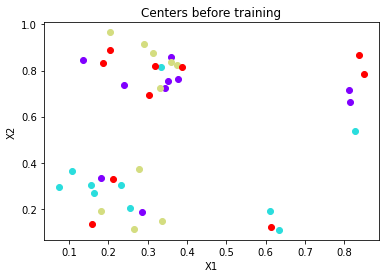

In [ ]:
# Randomly select (same seed) desirednumber of Center from dataset(X)
np.random.seed(50)
indices = np.random.choice(X.shape[0], np.sum(k_neurons) , replace=False)
c = X[indices]
# divide chosen centers between m partners
dict_c, k = {}, 0
for i, j in enumerate(k_neurons):
  if i == 0:
    dict_c[i] = c[:j, :]
    k = j
  else:
    dict_c[i] = c[k:k+j, :]
    k = k+j

# Plot centers before trainig
colors = cm.rainbow(np.linspace(0, 1, m_partner))
fig = plt.figure()
plt.xlabel('X1')
plt.ylabel('X2')
for key, value in dict_c.items():
  for k in range(len(value)):
    plt.scatter(value[k][0], value[k][1], color = colors[key])
plt.title('Centers before training')
plt.show()

In [ ]:
# For each data pattern, determine the winner neuron and winner partner. Then learn 
# the centers in that partner w.r.t their distances in a sortet list from winner neurons
for iter in range(500):
  for i in range(len(X)):
    # set the timer for decaying the learning_rate
    t = i
    min = 10**10
    r_best, key_best = [], 0
    # Copmute all the distances to find the winner neuron and partner
    for key, value in dict_c.items():
      r = []
      for k in range(len(value)):
        dist_XC = Euclidian(X[i], value[k])
        r.append(dist_XC)
      # Update the winner neuron and partner
      if np.amin(r) < min:
        r_best = np.array(r)
        min = np.amin(r_best)
        key_best = key

    # Creating the sorted list
    r_best_indices = np.argsort(r_best)
    r_best = np.sort(r_best)
    # Learning_rule: delta_c = Learning_rate(t)*h(dist(i, j), t)*(X[i] - Cj)
    # which h is the gaussian function with fixed size s and learning_rate is decaying with time
    for z, j in enumerate(r_best):
      delta_c = Learning_rate(t)*(guassian(z))*(X[i] - dict_c[key_best][r_best_indices[z]])
      dict_c[key_best][r_best_indices[z]] += delta_c

In [ ]:
# plotting the centers and writing the centers on a file
fig = plt.figure()
for key, value in dict_c.items():
  max_x, max_y= 0, 0
  indices = np.argsort(np.linalg.norm(value,axis=1))
  x, y = value[indices[-1]]
  for k in range(len(value)):
    plt.scatter(value[k][0], value[k][1], color = colors[key])
    if key == k == 0:
      f = open("PA-E-net.txt", "w")
    else:
      f = open("PA-E-net.txt", "a")
    f.write(str(value[k][0]) + '\t' + str(value[k][1]) + '\n')
    if np.absolute(value[k][0] - x) > np.absolute(max_x):
      max_x = value[k][0] - x
    if np.absolute(value[k][1] - y) > np.absolute(max_y):
      max_y = value[k][1] - y
  currentAxis = plt.gca()
  currentAxis.add_patch(Rectangle((x, y), max_x, max_y, facecolor="none", ec= colors[key], lw=0.5))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centers after training with M = '+str(m_partner))
plt.show()